#Loading data from kaggle

In [1]:
import json

jason = {"username":"ethanjolly","key":"31d85015eed2df99e20a63d604017440"}
with open('kaggle.json','w') as outfile:
  json.dump(jason, outfile)

!pip install kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle.json
!kaggle datasets download -d arbazkhan971/cuhk-face-sketch-database-cufs
!unzip cuhk-face-sketch-database-cufs.zip

Streaming output truncated to the last 5000 lines.
  inflating: cropped_sketch/00726.jpg  
  inflating: cropped_sketch/00727.jpg  
  inflating: cropped_sketch/00728.jpg  
  inflating: cropped_sketch/00729.jpg  
  inflating: cropped_sketch/00730.jpg  
  inflating: cropped_sketch/00731.jpg  
  inflating: cropped_sketch/00732.jpg  
  inflating: cropped_sketch/00733.jpg  
  inflating: cropped_sketch/00734.jpg  
  inflating: cropped_sketch/00735.jpg  
  inflating: cropped_sketch/00736.jpg  
  inflating: cropped_sketch/00737.jpg  
  inflating: cropped_sketch/00738.jpg  
  inflating: cropped_sketch/00739.jpg  
  inflating: cropped_sketch/00740.jpg  
  inflating: cropped_sketch/00741.jpg  
  inflating: cropped_sketch/00742.jpg  
  inflating: cropped_sketch/00743.jpg  
  inflating: cropped_sketch/00744.jpg  
  inflating: cropped_sketch/00745.jpg  
  inflating: cropped_sketch/00746.jpg  
  inflating: cropped_sketch/00747.jpg  
  inflating: cropped_sketch/00749.jpg  
  inflating: cropped_sketch/0

# Load Data

['f1-001-01-sz1.jpg', 'f1-002-01-sz1.jpg', 'f1-003-01-sz1.jpg', 'f1-004-01-sz1.jpg', 'f1-005-01-sz1.jpg', 'f1-006-01-sz1.jpg', 'f1-007-01-sz1.jpg', 'f1-008-01-sz1.jpg', 'f1-009-01-sz1.jpg', 'f1-010-01-sz1.jpg', 'f1-011-01-sz1.jpg', 'f1-012-01-sz1.jpg', 'f1-013-01-sz1.jpg', 'f1-014-01-sz1.jpg', 'f1-015-01-sz1.jpg', 'F2-005-01-sz1.jpg', 'F2-006-01-sz1.jpg', 'F2-007-01-sz1.jpg', 'F2-008-01-sz1.jpg', 'F2-009-01-sz1.jpg', 'F2-010-01-sz1.jpg', 'F2-011-01-sz1.jpg', 'F2-012-01-sz1.jpg', 'F2-013-01-sz1.jpg', 'F2-014-01-sz1.jpg', 'F2-015-01-sz1.jpg', 'F2-016-01-sz1.jpg', 'F2-017-01-sz1.jpg', 'F2-018-01-sz1.jpg', 'F2-019-01-sz1.jpg', 'F2-020-01-sz1.jpg', 'F2-021-01-sz1.jpg', 'F2-022-01-sz1.jpg', 'F2-023-01-sz1.jpg', 'F2-024-01-sz1.jpg', 'F2-025-01-sz1.jpg', 'F2-026-01-sz1.jpg', 'F2-027-01-sz1.jpg', 'F2-028-01-sz1.jpg', 'F2-029-01-sz1.jpg', 'F2-030-01-sz1.jpg', 'F2-031-01-sz1.jpg', 'F2-032-01-sz1.jpg', 'F2-033-01-sz1.jpg', 'F2-034-01-sz1.jpg', 'F2-035-01-sz1.jpg', 'F2-036-01-sz1.jpg', 'F2-037-01-s

188it [00:00, 197.70it/s]


940
[870, 480, 910, 818, 768, 221, 298, 47, 679, 301]


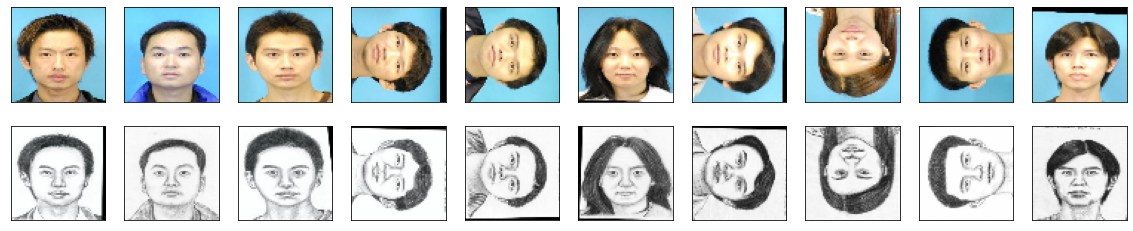

In [2]:
from locale import MON_1
import numpy as np
import os
import cv2 as cv
from tqdm import tqdm
import random
import itertools
import pandas as pd
import matplotlib.pyplot as plt


faces, sketches = [], []

facesfiles = os.listdir('photos')

f1, f, m, m1 = [], [], [], []
for fil in facesfiles:
  if fil[:2] == 'f1':
    f1.append(fil)
  elif fil[:2] == 'f-':
    f.append(fil)
  elif fil[:2] == 'm1':
    m1.append(fil) 
  elif fil[:2] == 'm-':
    m.append(fil)

facesfiles = list(itertools.chain(sorted(f1), sorted(f), sorted(m1), sorted(m)))

sketchesfiles = os.listdir('sketches')

f1sk, F2, fsk, m1sk, M2, msk = [], [], [], [], [], []
for fil in sketchesfiles:
  if fil[:2] == 'f1':
    f1sk.append(fil)
  elif fil[:2] == 'F2':
    F2.append(fil)
  elif fil[:2] == 'f-':
    fsk.append(fil) 
  elif fil[:2] == 'm1':
    m1sk.append(fil)
  elif fil[:2] == 'M2':
    M2.append(fil)
  elif fil[:2] == 'm-':
    msk.append(fil)

sketchesfiles = list(itertools.chain(sorted(f1sk), sorted(F2), sorted(fsk), sorted(m1sk), sorted(M2), sorted(msk)))
print(sketchesfiles)

for face, sketch in tqdm(zip(facesfiles, sketchesfiles)):
  imface = cv.imread('photos/{}'.format(face))
  imface = cv.cvtColor(imface, cv.COLOR_BGR2RGB)
  imface = cv.resize(imface, (64, 64))
  imface = imface.astype('float32') / 255.0
  faces.append(imface)

  faces.append(cv.flip(imface, 1))
  faces.append(cv.flip(imface, -1))

  faces.append(cv.rotate(imface, cv.ROTATE_90_CLOCKWISE))
  faces.append(cv.rotate(imface, cv.ROTATE_90_COUNTERCLOCKWISE))

  skface = cv.imread('sketches/{}'.format(sketch))
  skface = cv.resize(skface, (64, 64))
  skface = skface.astype('float32') / 255.0
  sketches.append(skface)

  sketches.append(cv.flip(skface, 1))
  sketches.append(cv.flip(skface, -1))

  sketches.append(cv.rotate(skface, cv.ROTATE_90_CLOCKWISE))
  sketches.append(cv.rotate(skface, cv.ROTATE_90_COUNTERCLOCKWISE))


print(len(sketches))

# cv.imshow("Display window", faces[0])

# plt.figure()
# print(facesfiles[127])
# plt.imshow(faces[127])
# plt.show()
# plt.figure()
# print(sketchesfiles[127])
# plt.imshow(sketches[127])
# plt.show()

randomImages = random.sample(range(0, len(sketches)), 10)
print(randomImages)
n = 10  # How many to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display face
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(faces[randomImages[i]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display sketch
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(sketches[randomImages[i]])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Split data

(940, 64, 64, 3)
(940, 64, 64, 3)
940
(752, 64, 64, 3)
(188, 64, 64, 3)


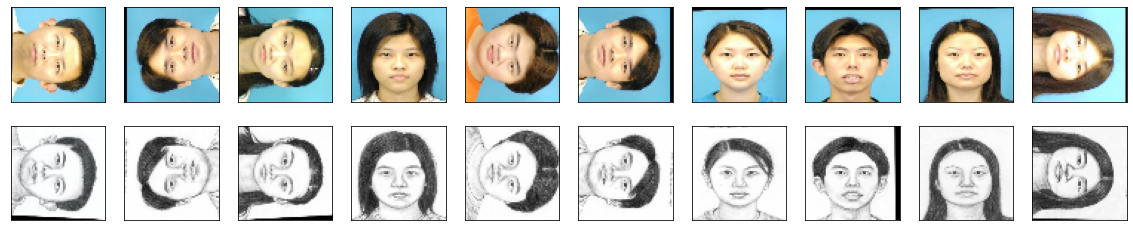

In [3]:
data = list(zip(faces, sketches))
random.Random(1).shuffle(data)
faces, sketches = zip(*data)
faces = np.array(faces)
sketches = np.array(sketches)

print(faces.shape)
print(sketches.shape)

n = faces.shape[0]
print(n)

trainTestSplit = 0.8
faceTrain = faces[:752, :, :, :]
faceTest = faces[752:, :, :, :]
sketchTrain = sketches[:752, :, :, :]
sketchTest = sketches[752:, :, :, :]

print(faceTrain.shape)
print(faceTest.shape)
n = 10  # How many to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display face
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(faceTest[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display sketch
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(sketchTest[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Model

In [ ]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Dropout, Flatten, Dense, Conv2D, MaxPooling2D, Input, Reshape, UpSampling2D, InputLayer, Lambda, ZeroPadding2D, Cropping2D, Conv2DTranspose, BatchNormalization, LeakyReLU
from keras.losses import binary_crossentropy
from keras import backend as K
from keras.losses import mse, binary_crossentropy

from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

b_size = 128
n_size = 512
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape = (n_size,) , mean = 0, stddev = 1)
    return z_mean + K.exp(z_log_sigma/2) * epsilon
  
def build_conv_vae(input_shape, bottleneck_size, sampling):
    
    # ENCODER
    input = Input(shape=(input_shape[0],input_shape[1],input_shape[2]))
    x = Conv2D(16,(5,5), 2, padding = 'same', kernel_initializer = 'he_normal')(input)   
    x = LeakyReLU()(x)
    x = Dropout(0.1)(x)   
    x = Conv2D(32,(3,3), 2, padding = 'same', kernel_initializer = 'he_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)   
    x = Conv2D(64,(3,3), 2, padding = 'same', kernel_initializer = 'he_normal')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.1)(x) 
    x = Conv2D(128,(2,2), 2, padding = 'same', kernel_initializer = 'he_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x) 
    
    # Latent Variable Calculation
    shape = K.int_shape(x)
    flatten_1 = Flatten()(x)
    dense_1 = Dense(bottleneck_size, name='z_mean')(flatten_1)
    z_mean = BatchNormalization()(dense_1)
    flatten_2 = Flatten()(x)
    dense_2 = Dense(bottleneck_size, name ='z_log_sigma')(flatten_2)
    z_log_sigma = BatchNormalization()(dense_2)
    z = Lambda(sampling)([z_mean, z_log_sigma])
    encoder = Model(input, [z_mean, z_log_sigma, z], name = 'encoder')
    
    # DECODER
    latent_input = Input(shape=(bottleneck_size,), name = 'decoder_input')
    x = Dense(shape[1]*shape[2]*shape[3])(latent_input)
    x = Reshape((shape[1],shape[2],shape[3]))(x)
    x = Conv2DTranspose(128,(2,2), 2, padding = 'same', kernel_initializer = 'he_normal')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.1)(x) 
    x = Conv2DTranspose(64,(2,2), 2, padding = 'same', kernel_initializer = 'he_normal')(x)
    x = LeakyReLU()(x)
    x = Conv2DTranspose(32,(3,3), 2, padding = 'same', kernel_initializer = 'he_normal')(x)
    x = LeakyReLU()(x)
    x = Dropout(0.1)(x) 
    x = Conv2DTranspose(16,(3,3), 2, padding = 'same', kernel_initializer = 'he_normal')(x)
    x = LeakyReLU()(x)
    output = Conv2DTranspose(3,(5,5), 1, activation = 'sigmoid', padding ='same')(x)
    decoder = Model(latent_input, output, name = 'decoder')

    output_2 = decoder(encoder(input)[2])
    vae = Model(input, output_2, name ='vae')
    return vae, encoder, decoder, z_mean, z_log_sigma

vae_2, encoder, decoder, z_mean, z_log_sigma = build_conv_vae((64, 64, 3), n_size, sampling)
print("encoder summary:")
encoder.summary()
print("decoder summary:")
decoder.summary()
print("vae summary:")
vae_2.summary()

Instructions for updating:
Colocations handled automatically by placer.
encoder summary:
Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 16)   1216        ['input_1[0][0]']                
                                                                                                  
 leaky_re_lu (LeakyReLU)        (None, 32, 32, 16)   0           ['conv2d[0][0]']                 
                                                                                                  
 dropout (Dropout)              (None, 32, 32, 16)   0           ['leaky_re_lu[0][0]']            
   

In [ ]:
import tensorflow as tf

def ssim_loss(y_true, y_pred):
  return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 2.0))


def vae_loss(input_img, output):
    reconstruction_loss = ssim_loss(input_img, output)
    
    # Compute the KL Divergence regularization term
    kl_loss = - 0.5 * K.sum(1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma), axis = -1)
    
    # Return the average loss over all images in batch
    total_loss = (reconstruction_loss + 0.0001 * kl_loss)    
    return total_loss

In [ ]:
vae_2.compile(optimizer='adam', loss= vae_loss, experimental_run_tf_function=False, metrics=['mse', 'mae'])

# Train


#face2sketch

Train on 752 samples, validate on 188 samples
Epoch 1/100
752/752 [==============================] - ETA: 0s - loss: 0.7884 - mse: 0.1621 - mae: 0.3791

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


752/752 [==============================] - 27s 36ms/sample - loss: 0.7884 - mse: 0.1621 - mae: 0.3791 - val_loss: 0.8063 - val_mse: 0.1474 - val_mae: 0.3638
Epoch 2/100
752/752 [==============================] - 26s 34ms/sample - loss: 0.6239 - mse: 0.0953 - mae: 0.2653 - val_loss: 0.5195 - val_mse: 0.0529 - val_mae: 0.1474
Epoch 3/100
752/752 [==============================] - 26s 34ms/sample - loss: 0.4647 - mse: 0.0473 - mae: 0.1405 - val_loss: 0.4358 - val_mse: 0.0409 - val_mae: 0.1174
Epoch 4/100
752/752 [==============================] - 26s 34ms/sample - loss: 0.4105 - mse: 0.0398 - mae: 0.1202 - val_loss: 0.4062 - val_mse: 0.0402 - val_mae: 0.1198
Epoch 5/100
752/752 [==============================] - 26s 34ms/sample - loss: 0.3939 - mse: 0.0383 - mae: 0.1154 - val_loss: 0.3877 - val_mse: 0.0389 - val_mae: 0.1151
Epoch 6/100
752/752 [==============================] - 26s 34ms/sample - loss: 0.3718 - mse: 0.0357 - mae: 0.1086 - val_loss: 0.3561 - val_mse: 0.0332 - val_mae: 0.100

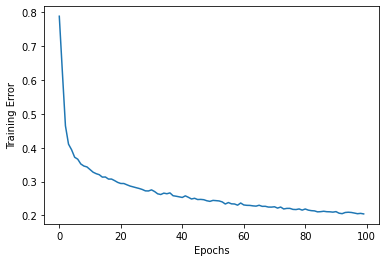

In [ ]:
vae_2Train = vae_2.fit(faceTrain, sketchTrain, epochs = 100, batch_size = 32,
                   validation_data=(faceTest, sketchTest))

plt.plot(vae_2Train.history["loss"])
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.show()

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


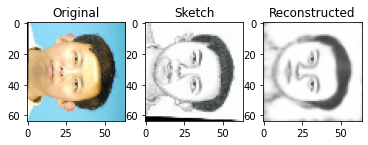

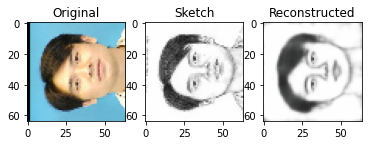

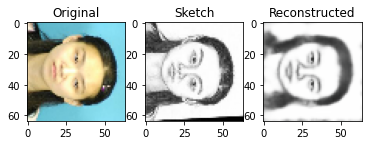

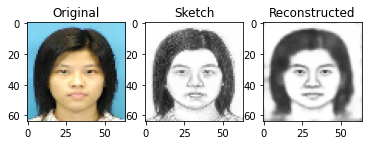

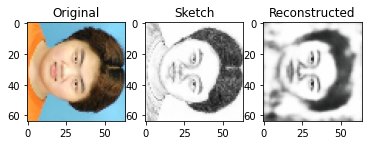

In [ ]:
for i in range(5):
    decode = vae_2.predict(faceTest)

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(faceTest[i])

    plt.subplot(1,3,2)
    plt.title("Sketch")
    plt.imshow(sketchTest[i])

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(decode[i])
    plt.show()

#sketch2face

Train on 752 samples, validate on 188 samples
Epoch 1/100
752/752 [==============================] - ETA: 0s - loss: 0.7370 - mse: 0.0898 - mae: 0.2596

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


752/752 [==============================] - 27s 37ms/sample - loss: 0.7370 - mse: 0.0898 - mae: 0.2596 - val_loss: 0.6797 - val_mse: 0.0881 - val_mae: 0.2569
Epoch 2/100
752/752 [==============================] - 26s 34ms/sample - loss: 0.6277 - mse: 0.0797 - mae: 0.2404 - val_loss: 0.5541 - val_mse: 0.0756 - val_mae: 0.2241
Epoch 3/100
752/752 [==============================] - 26s 34ms/sample - loss: 0.5018 - mse: 0.0620 - mae: 0.2032 - val_loss: 0.5024 - val_mse: 0.0586 - val_mae: 0.1897
Epoch 4/100
752/752 [==============================] - 26s 34ms/sample - loss: 0.4358 - mse: 0.0498 - mae: 0.1786 - val_loss: 0.4457 - val_mse: 0.0506 - val_mae: 0.1762
Epoch 5/100
752/752 [==============================] - 26s 34ms/sample - loss: 0.4036 - mse: 0.0448 - mae: 0.1674 - val_loss: 0.3757 - val_mse: 0.0412 - val_mae: 0.1594
Epoch 6/100
752/752 [==============================] - 26s 34ms/sample - loss: 0.3852 - mse: 0.0400 - mae: 0.1550 - val_loss: 0.3970 - val_mse: 0.0399 - val_mae: 0.147

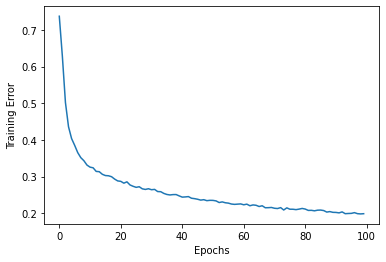

In [ ]:
vae_2skf, encoder, decoder, z_mean, z_log_sigma = build_conv_vae((64, 64, 3), n_size, sampling)
vae_2skf.compile(optimizer='adam', loss= vae_loss, experimental_run_tf_function=False, metrics=['mse', 'mae'])
vae_2skfTrain = vae_2skf.fit(sketchTrain, faceTrain, epochs = 100, batch_size = 32, shuffle=True,
                   validation_data=(sketchTest, faceTest))

plt.plot(vae_2skfTrain.history["loss"])
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.show()

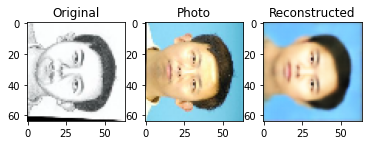

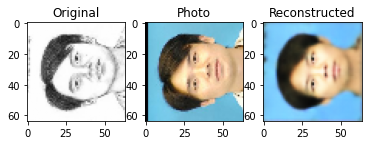

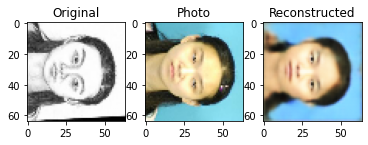

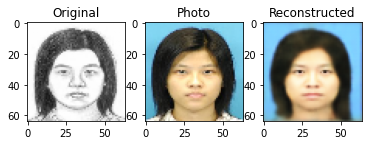

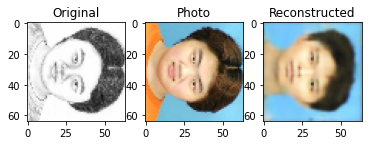

In [ ]:
for i in range(5):
    decode = vae_2skf.predict(sketchTest)

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(sketchTest[i])

    plt.subplot(1,3,2)
    plt.title("Photo")
    plt.imshow(faceTest[i])

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(decode[i])
    plt.show()